In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load data

In [3]:
data = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\data.csv")
labels = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\labels.csv")

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ayarmanco\AppData\Local\Temp\ipykernel_40148\923119767.py:1: SyntaxWarning: invalid escape sequence '\.'
  data = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\data.csv")
C:\Users\ayarmanco\AppData\Local\Temp\ipykernel_40148\923119767.py:2: SyntaxWarning: invalid escape sequence '\.'
  labels = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\labels.csv")


## Pre-Processing

In [4]:
data = data.rename(columns={"Unnamed: 0": "sample_id"})
labels = labels.rename(columns={"Unnamed: 0": "sample_id"})
genes = data.filter(regex="gene_")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(genes)

## PCA implementation and visualization

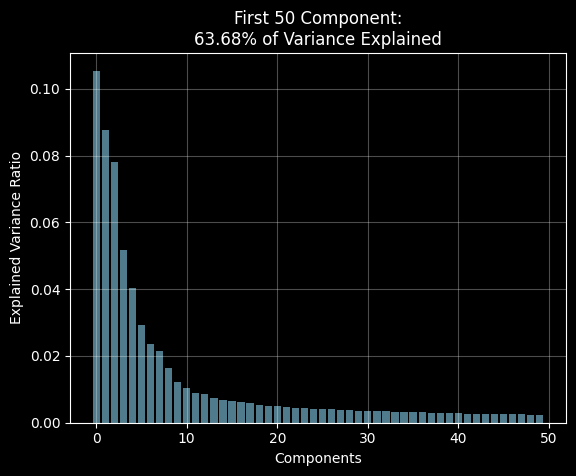

In [45]:
# Initialize PCA (specify components or retain variance)
pca = PCA(n_components=50)
principal_components = pca.fit_transform(scaled_data)

# Calculate explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_
components = range(len(explained_variance))

# Bar plot for individual explained variance
bars = plt.bar(components, explained_variance, alpha=0.6, color='skyblue', label='Individual Variance')

# Labels and title
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.title(f'First {len(explained_variance)} Component:\n{sum(explained_variance)*100:.2f}% of Variance Explained')
plt.grid(True, alpha=0.3)

plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_data, labels["Class"], test_size=0.2, random_state=42
)

pca = PCA(n_components=50)
X_train = pca.fit_transform(X_train)

In [51]:
# Initialize KNN (adjust n_neighbors as needed)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [52]:
X_test = pca.transform(X_test)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9937888198757764

Confusion Matrix:
 [[61  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 1  0  0 28  0]
 [ 0  0  0  0 29]]

Classification Report:
               precision    recall  f1-score   support

        BRCA       0.98      1.00      0.99        61
        COAD       1.00      1.00      1.00        17
        KIRC       1.00      1.00      1.00        25
        LUAD       1.00      0.97      0.98        29
        PRAD       1.00      1.00      1.00        29

    accuracy                           0.99       161
   macro avg       1.00      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



## Pipeline

In [ ]:
pca = PCA(n_components=50)
principal_components = pca.fit_transform(scaled_data)
